### xcube utility function `compute_array_from_func`

This NB explains how the function `xcube.util.daskcompute_array_from_func` can be used to create a `xarray.DataArray` whose chunks are computed from a user function.

In [1]:
import numpy as np
import xarray as xr
from dask.distributed import Client
from xcube.util.dask import compute_array_from_func

In [2]:
if __name__ == '__main__':
    client = Client()

The above cell is needed for autoated runs of the notebook, in case you are executing it on your machine please feel free to use the cell below:

In [3]:
# if client:
#     client.close()
# client = Client(processes=True)

In [4]:
# The argument names passed to compute_my_chunk().
arg_names=['shape', 'dtype', 'block_shape', 'block_slices']

def compute_my_chunk(shape, dtype, block_shape, block_slices):
    """
    Called for every chunk.
    This example fills the chunk with unique numbers. 
    """
    bh, bw = block_shape
    (bsy, _), (bsx, _) = block_slices
    _, w = shape
    block = np.ndarray((bh, bw), dtype=dtype)
    for j in range(bh):
        for i in range(bw):
            block[j, i] = 0.1 * ((bsy + j) * w + bsx + i)
    return block

In [5]:
a = compute_array_from_func(compute_my_chunk, 
                            shape=(1024, 2048), 
                            chunks=(256, 512), 
                            dtype=np.float64, 
                            ctx_arg_names=arg_names)

In [6]:
a

dask.array<concatenate, shape=(1024, 2048), dtype=float64, chunksize=(256, 512), chunktype=numpy.ndarray>

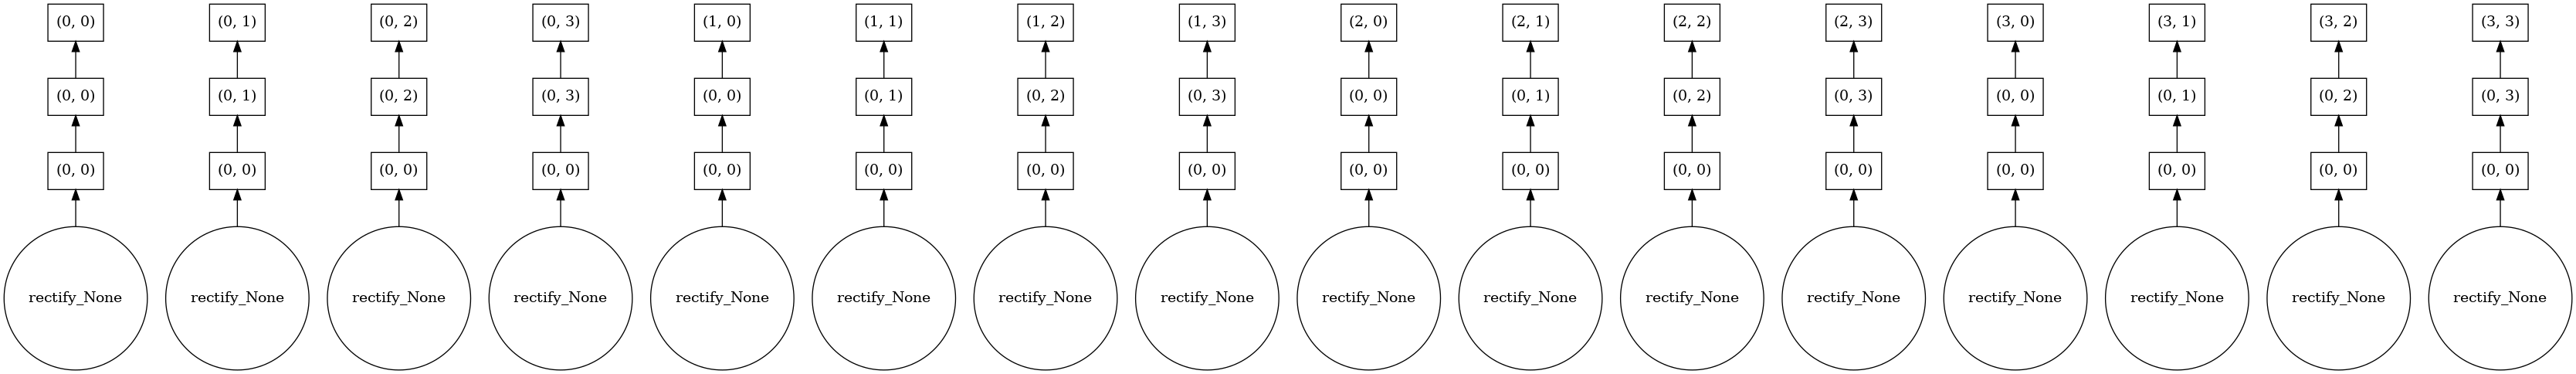

In [7]:
import graphviz
a.visualize()

In [8]:
np.array(a)

array([[0.000000e+00, 1.000000e-01, 2.000000e-01, ..., 2.045000e+02,
        2.046000e+02, 2.047000e+02],
       [2.048000e+02, 2.049000e+02, 2.050000e+02, ..., 4.093000e+02,
        4.094000e+02, 4.095000e+02],
       [4.096000e+02, 4.097000e+02, 4.098000e+02, ..., 6.141000e+02,
        6.142000e+02, 6.143000e+02],
       ...,
       [2.091008e+05, 2.091009e+05, 2.091010e+05, ..., 2.093053e+05,
        2.093054e+05, 2.093055e+05],
       [2.093056e+05, 2.093057e+05, 2.093058e+05, ..., 2.095101e+05,
        2.095102e+05, 2.095103e+05],
       [2.095104e+05, 2.095105e+05, 2.095106e+05, ..., 2.097149e+05,
        2.097150e+05, 2.097151e+05]])

In [9]:
da = xr.DataArray(a, dims=('y', 'x'))

In [10]:
da

<xarray.DataArray 'concatenate-1f52a33488ced38dc810d95cf5d58dee' (y: 1024, x: 2048)>
dask.array<concatenate, shape=(1024, 2048), dtype=float64, chunksize=(256, 512), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In case you are executing it on your machine please feel free to use the cell below to close the client:

In [11]:
#client.close()